In [16]:
import pandas as pd

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

import xgboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import xgboost as xgb
import catboost


In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, roc_auc_score, precision_recall_curve, roc_curve, auc

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import numpy as np

In [19]:
# Get training and testing data
all_train = pd.read_csv("Data/InputData/all_loc_train.csv")
all_test = pd.read_csv("Data/InputData/all_loc_test.csv")

all_train.head()

,#,label,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,AAAGG,AAAGT,AAATA,AAATC,AAATG,AAATT,AACAA,AACAC,AACAG,AACAT,AACCA,AACCC,AACCG,AACCT,AACGA,AACGC,AACGG,AACGT,AACTA,AACTC,AACTG,AACTT,AAGAA,AAGAC,AAGAG,AAGAT,AAGCA,AAGCC,...,TTCGA,TTCGC,TTCGG,TTCGT,TTCTA,TTCTC,TTCTG,TTCTT,TTGAA,TTGAC,TTGAG,TTGAT,TTGCA,TTGCC,TTGCG,TTGCT,TTGGA,TTGGC,TTGGG,TTGGT,TTGTA,TTGTC,TTGTG,TTGTT,TTTAA,TTTAC,TTTAG,TTTAT,TTTCA,TTTCC,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,mRNALoc_403#10320|0|training,0,0.003643,0.000792,0.001426,0.002218,0.001584,0.000950,0.000792,0.000950,0.001901,0.001742,0.000634,0.001267,0.001584,0.001742,0.002693,0.001901,0.001742,0.001109,0.001267,0.001109,0.001584,0.000475,0.000000,0.000792,0.000634,0.000475,0.000792,0.000475,0.000950,0.000634,0.000950,0.000317,0.001742,0.000634,0.002059,0.001267,0.001267,0.002218,...,0.000317,0.000317,0.000317,0.000000,0.001109,0.001584,0.001584,0.002376,0.001742,0.000475,0.001267,0.000792,0.001109,0.000475,0.000317,0.001267,0.001426,0.000317,0.001426,0.001267,0.001901,0.000475,0.001426,0.002059,0.001742,0.001267,0.001109,0.000792,0.002059,0.001584,0.000000,0.002693,0.002059,0.001109,0.001109,0.002534,0.001584,0.001901,0.003168,0.003643
1,mRNALoc_4404#20399|0|training,0,0.002914,0.000291,0.000583,0.000291,0.000583,0.000000,0.000000,0.000583,0.000874,0.001457,0.000583,0.000583,0.000583,0.000291,0.000583,0.000000,0.000291,0.000874,0.000291,0.000583,0.000583,0.001457,0.000583,0.000291,0.000583,0.000000,0.000583,0.000000,0.000291,0.000583,0.000874,0.000291,0.000874,0.000291,0.003205,0.000000,0.000874,0.001457,...,0.001166,0.000291,0.000291,0.000000,0.000291,0.001166,0.001748,0.000874,0.000291,0.000291,0.001748,0.000291,0.000000,0.001457,0.000291,0.000583,0.000874,0.000874,0.000583,0.001457,0.000291,0.001457,0.001166,0.001457,0.000291,0.000000,0.000000,0.000291,0.000583,0.000874,0.000583,0.000291,0.000583,0.000291,0.000000,0.001166,0.000291,0.001166,0.000583,0.000291
2,mRNALoc_3392#17196|0|training,0,0.002291,0.001375,0.000458,0.001375,0.000000,0.000917,0.000458,0.001375,0.001375,0.000917,0.000917,0.000000,0.001375,0.000917,0.000458,0.000458,0.000000,0.001833,0.000917,0.000458,0.000458,0.001833,0.000000,0.000458,0.000458,0.000000,0.000917,0.000917,0.000917,0.000458,0.000458,0.000917,0.001833,0.000917,0.002291,0.001375,0.001375,0.000458,...,0.000917,0.000000,0.000000,0.001375,0.000917,0.001833,0.000458,0.002750,0.001375,0.000458,0.000458,0.000917,0.000917,0.000917,0.000000,0.000000,0.000458,0.000458,0.000000,0.000458,0.000000,0.000458,0.000917,0.002291,0.001833,0.000000,0.001833,0.000000,0.000458,0.002291,0.000917,0.001375,0.000917,0.000458,0.000458,0.000917,0.000917,0.002750,0.000458,0.000458
3,mRNALoc_3095#162989|0|training,0,0.000000,0.000990,0.000495,0.000000,0.000990,0.000990,0.000000,0.000495,0.001484,0.000000,0.001979,0.000495,0.000000,0.000000,0.000495,0.000495,0.000495,0.000000,0.000495,0.000495,0.001979,0.000000,0.000000,0.000990,0.000000,0.000495,0.000000,0.000000,0.000000,0.000495,0.000990,0.000000,0.000000,0.000495,0.000495,0.000495,0.000495,0.000000,...,0.000990,0.000495,0.000000,0.000000,0.000000,0.001979,0.002474,0.000990,0.000000,0.000990,0.000495,0.000495,0.000990,0.000495,0.000000,0.000495,0.001484,0.000495,0.001979,0.000000,0.000495,0.000000,0.000495,0.000495,0.000000,0.000990,0.000000,0.000000,0.000000,0.000990,0.000000,0.000495,0.000990,0.000000,0.001484,0.000495,0.000495,0.000000,0.000000,0.000000
4,mRNALoc_1488#117177|0|training,0,0.013061,0.002488,0.004043,0.004354,0.001451,0.001348,0.000415,0.002902,0.003110,0.001244,0.001866,0.001866,0.003006,0.002073,0.002799,0.002695,0.001451,0.000933,0.001244,0.001659,0.001037,0.000726,0.000104,0.001244,0.000207,0.000104,0.000104,0.000311,0.001659,0.001451,0.001555,0.001451,0.003524,0.001348,0.002177,0.001451,0.001970,0.000415,...,0.000415,0.000000,0.000311,0.000104,0.001348,0.001244,0.001866,0.001037,0.002073,0.000829,0.001970,0.001037,0.001555,0.000829,0.000104,0.001659,0.002177,0.000829,0.002280,0.00124

In [20]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Columns: 1026 entries, # to TTTTT
dtypes: float64(1024), int64(1), object(1)
memory usage: 16.0+ MB


In [21]:
all_test.head()

,#,label,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,AAAGG,AAAGT,AAATA,AAATC,AAATG,AAATT,AACAA,AACAC,AACAG,AACAT,AACCA,AACCC,AACCG,AACCT,AACGA,AACGC,AACGG,AACGT,AACTA,AACTC,AACTG,AACTT,AAGAA,AAGAC,AAGAG,AAGAT,AAGCA,AAGCC,...,TTCGA,TTCGC,TTCGG,TTCGT,TTCTA,TTCTC,TTCTG,TTCTT,TTGAA,TTGAC,TTGAG,TTGAT,TTGCA,TTGCC,TTGCG,TTGCT,TTGGA,TTGGC,TTGGG,TTGGT,TTGTA,TTGTC,TTGTG,TTGTT,TTTAA,TTTAC,TTTAG,TTTAT,TTTCA,TTTCC,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,mRNALoc_16986#79230|0|testing,0,0.008836,0.002834,0.002334,0.003168,0.001667,0.003168,0.000000,0.002001,0.002001,0.001834,0.001501,0.001000,0.001334,0.002001,0.001667,0.001334,0.001501,0.001000,0.001167,0.001000,0.001834,0.001334,0.000333,0.002001,0.000333,0.000167,0.000000,0.000333,0.000500,0.002001,0.001334,0.001167,0.001667,0.000667,0.001834,0.001501,0.001334,0.001334,...,0.000333,0.000167,0.000500,0.000167,0.000834,0.001834,0.000500,0.001834,0.001000,0.000167,0.001501,0.000834,0.000834,0.000834,0.000167,0.000834,0.001000,0.001000,0.001334,0.001000,0.000834,0.000333,0.001834,0.001000,0.001334,0.000167,0.000500,0.001834,0.002167,0.001000,0.000834,0.001834,0.001167,0.000500,0.001667,0.001834,0.001667,0.002501,0.002001,0.011504
1,mRNALoc_8139#3082|0|testing,0,0.009503,0.002501,0.003168,0.006002,0.003001,0.000834,0.000167,0.002668,0.003501,0.000834,0.001834,0.002501,0.004335,0.002834,0.002834,0.004335,0.002668,0.001334,0.001334,0.002001,0.001167,0.000167,0.000167,0.000333,0.000167,0.000000,0.000000,0.000000,0.001334,0.000667,0.000834,0.001667,0.002834,0.001667,0.001167,0.003168,0.001000,0.000333,...,0.000167,0.000000,0.000000,0.000167,0.000834,0.002001,0.001167,0.002668,0.002334,0.000834,0.001167,0.000834,0.001000,0.001000,0.000167,0.001334,0.001167,0.001000,0.000667,0.001334,0.002001,0.001501,0.001167,0.002668,0.004168,0.001834,0.001501,0.003001,0.003001,0.001501,0.000167,0.003168,0.001667,0.001334,0.001667,0.003501,0.005835,0.001667,0.003501,0.005669
2,mRNALoc_19034#8816|0|testing,0,0.006005,0.001168,0.002168,0.001168,0.001668,0.001334,0.000167,0.000334,0.002669,0.001001,0.002335,0.001334,0.001001,0.000834,0.001334,0.001168,0.001501,0.001334,0.001501,0.001168,0.002335,0.000834,0.000000,0.001168,0.000334,0.000834,0.000834,0.000000,0.001001,0.001168,0.000500,0.001168,0.002502,0.001668,0.001835,0.001835,0.000667,0.002002,...,0.000334,0.000000,0.000667,0.000000,0.001001,0.002502,0.001835,0.001668,0.000667,0.000500,0.001668,0.000500,0.001001,0.000834,0.000167,0.000500,0.001001,0.001168,0.001168,0.001501,0.000667,0.000834,0.001835,0.001835,0.002335,0.000500,0.001001,0.002168,0.001334,0.001001,0.000167,0.001168,0.000834,0.001501,0.000667,0.001668,0.002502,0.001001,0.001334,0.002002
3,mRNALoc_19863#9737|0|testing,0,0.005673,0.001335,0.002503,0.002837,0.001502,0.001335,0.000167,0.001001,0.003170,0.001335,0.001335,0.001502,0.001168,0.001502,0.001669,0.002002,0.001335,0.000667,0.001669,0.001001,0.001168,0.000501,0.000000,0.000334,0.000167,0.000167,0.000167,0.000000,0.000501,0.000667,0.001835,0.000334,0.005340,0.001335,0.005340,0.001502,0.001502,0.003170,...,0.000334,0.000167,0.000834,0.000167,0.000334,0.000667,0.005173,0.001168,0.001835,0.000501,0.002336,0.001168,0.001168,0.000667,0.000000,0.001335,0.001001,0.000334,0.003004,0.002503,0.000667,0.001669,0.000667,0.001335,0.001168,0.000334,0.001001,0.000834,0.002336,0.000667,0.000000,0.001168,0.002002,0.001001,0.002670,0.001001,0.001168,0.000834,0.001669,0.001502
4,mRNALoc_19031#8816|0|testing,0,0.006008,0.001168,0.002170,0.001168,0.001669,0.001335,0.000167,0.000334,0.002670,0.000834,0.002336,0.001502,0.001001,0.000834,0.001335,0.001168,0.001502,0.001335,0.001502,0.001168,0.002336,0.000834,0.000000,0.001168,0.000334,0.000834,0.000834,0.000000,0.001001,0.001168,0.000501,0.001168,0.002503,0.001669,0.001836,0.001836,0.000501,0.002003,...,0.000334,0.000000,0.000668,0.000000,0.001001,0.002503,0.001836,0.001669,0.000668,0.000501,0.001669,0.000501,0.001001,0.000834,0.000167,0.000501,0.001001,0.001168,0.001168,0.001502,0.00

In [22]:
all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Columns: 1026 entries, # to TTTTT
dtypes: float64(1024), int64(1), object(1)
memory usage: 4.0+ MB


In [23]:
# Remove gene name/symbol column
noname_train = all_train.drop("#", axis="columns")
noname_test = all_test.drop("#", axis="columns")

noname_train.tail()

,label,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,AAAGG,AAAGT,AAATA,AAATC,AAATG,AAATT,AACAA,AACAC,AACAG,AACAT,AACCA,AACCC,AACCG,AACCT,AACGA,AACGC,AACGG,AACGT,AACTA,AACTC,AACTG,AACTT,AAGAA,AAGAC,AAGAG,AAGAT,AAGCA,AAGCC,AAGCG,...,TTCGA,TTCGC,TTCGG,TTCGT,TTCTA,TTCTC,TTCTG,TTCTT,TTGAA,TTGAC,TTGAG,TTGAT,TTGCA,TTGCC,TTGCG,TTGCT,TTGGA,TTGGC,TTGGG,TTGGT,TTGTA,TTGTC,TTGTG,TTGTT,TTTAA,TTTAC,TTTAG,TTTAT,TTTCA,TTTCC,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
2035,3,0.004505,0.001855,0.004240,0.004240,0.001855,0.000928,0.000265,0.002385,0.003843,0.002253,0.002120,0.002253,0.002783,0.001193,0.002783,0.002120,0.002253,0.000795,0.001723,0.001325,0.001060,0.000530,0.000132,0.001325,0.000132,0.000398,0.000265,0.000132,0.000530,0.001060,0.002120,0.002253,0.004505,0.001325,0.002385,0.001988,0.002518,0.000928,0.000398,...,0.000663,0.000398,0.000530,0.000132,0.001988,0.001060,0.001193,0.001723,0.003048,0.000928,0.001060,0.001590,0.001325,0.001590,0.000398,0.002650,0.002253,0.001193,0.000795,0.000928,0.001060,0.000530,0.001325,0.001590,0.001458,0.001060,0.001458,0.001988,0.002120,0.000928,0.000265,0.002518,0.002120,0.001723,0.001458,0.002253,0.000928,0.002253,0.002518,0.003710
2036,3,0.003446,0.003048,0.003711,0.002518,0.003711,0.001060,0.001193,0.002253,0.004506,0.002385,0.002385,0.001458,0.001590,0.001590,0.002650,0.003048,0.003843,0.001060,0.003843,0.001988,0.001590,0.000663,0.000795,0.000265,0.000398,0.000398,0.000398,0.000795,0.000663,0.001060,0.002783,0.002385,0.006891,0.002253,0.004638,0.003180,0.001988,0.001988,0.000795,...,0.000398,0.000530,0.000133,0.000530,0.001193,0.001193,0.001060,0.000265,0.002120,0.000928,0.002253,0.001193,0.001060,0.000663,0.000133,0.001590,0.001855,0.000530,0.000530,0.000000,0.000663,0.000795,0.000133,0.000928,0.001193,0.000265,0.000265,0.000530,0.000795,0.000265,0.000265,0.001193,0.000928,0.000398,0.000795,0.000663,0.000398,0.000133,0.000928,0.000398
2037,3,0.001989,0.001061,0.002519,0.002254,0.000663,0.001458,0.000928,0.001193,0.002254,0.002386,0.001591,0.001591,0.001061,0.001458,0.001989,0.000795,0.000795,0.001326,0.001061,0.001061,0.001061,0.001326,0.000530,0.000530,0.000663,0.000530,0.000795,0.000265,0.000928,0.000795,0.001458,0.000795,0.003845,0.002386,0.001856,0.002254,0.001989,0.001989,0.000265,...,0.000795,0.000398,0.000133,0.000265,0.000530,0.000663,0.002784,0.001856,0.001591,0.000795,0.001458,0.001326,0.000795,0.000663,0.000398,0.001856,0.002519,0.000133,0.000928,0.001326,0.000398,0.000795,0.000795,0.001458,0.000795,0.001061,0.001458,0.001856,0.000795,0.000398,0.000133,0.001591,0.001458,0.001193,0.001856,0.000928,0.001458,0.000928,0.001591,0.002386
2038,3,0.003182,0.001193,0.002254,0.000398,0.001326,0.001591,0.000265,0.001326,0.001856,0.001591,0.001856,0.000663,0.000663,0.000663,0.001326,0.000796,0.000928,0.001061,0.001326,0.000663,0.000663,0.001724,0.000398,0.000796,0.000398,0.000265,0.000133,0.000265,0.000133,0.000928,0.001724,0.001061,0.003050,0.002652,0.004641,0.002652,0.002254,0.003050,0.000265,...,0.000398,0.000398,0.000000,0.000265,0.000530,0.001724,0.001061,0.000796,0.001193,0.000265,0.001591,0.000663,0.000663,0.000796,0.000133,0.000928,0.001724,0.000663,0.000265,0.000530,0.000530,0.000928,0.000928,0.000265,0.000265,0.000133,0.000133,0.000530,0.000530,0.001591,0.000265,0.000663,0.001856,0.000928,0.000265,0.000398,0.000530,0.000398,0.000663,0.000398
2039,3,0.010356,0.003054,0.005709,0.004647,0.003850,0.001328,0.000398,0.002390,0.004780,0.001859,0.002257,0.002124,0.003983,0.001593,0.002523,0.003319,0.002390,0.000531,0.001859,0.002257,0.000664,0.001062,0.000133,0.001195,0.000266,0.000133,0.000133,0.000133,0.002124,0.000664,0.001062,0.001726,0.004647,0.000929,0.002390,0.002655,0.001328,0.000664,0.000266,...,0.000133,0.000531,0.000266,0.000000,0.002257,0.001859,0.002124,0.002257,0.001859,0.000531,0.001062,0.001195,0.001062,0.000133,0.000266,0.001859,0.001328,0.000929,0.001062,0.001328,0.001195,0.001062,0.001062,0.002655,0.004381,0.001195,0.001195,0.001859,0.002523,0.00

In [24]:
# Create training and testing input (X) and output (y) data

X_train = noname_train.drop("label", axis="columns")
y_train = noname_train[["label"]]
y_train = y_train.values.ravel() #returns 1D, flattened array

X_test = noname_test.drop("label", axis="columns")
y_test = noname_test[["label"]]
y_test = y_test.values.ravel()

print("Training input data shape:\n", X_train.shape)
print("Training output data shape:\n", y_train.shape, "\n")

print("Testing input data shape:\n", X_test.shape)
print("Testing input data shape:\n", y_test.shape)




Training input data shape:
 (2040, 1024)
Training output data shape:
 (2040,) 

Testing input data shape:
 (510, 1024)
Testing input data shape:
 (510,)


In [25]:
all_train["label"].value_counts()

label
0    824
3    640
1    296
2    280
Name: count, dtype: int64

In [26]:
# Model preparation

models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier()))
models.append(("Random Forest Classifier", RandomForestClassifier()))
models.append(("K Neighbors Classifier", KNeighborsClassifier()))
models.append(("Bernoulli Naive Bayes", BernoulliNB()))
models.append(("Bagging Classifier", BaggingClassifier()))
models.append(("Ada Boost Classifier", AdaBoostClassifier()))
models.append(("Gaussian Naive Bayes", GaussianNB()))
models.append(("Stochastic Gradient Descent Classifier", SGDClassifier()))
models.append(("Support Vector Machine", SVC()))
models.append(("XGBoost", XGBClassifier()))
models.append(("CatBoostClassifier", CatBoostClassifier()))

In [27]:
# Model evaluation

accuracies = []
names = []

for name, model in models:

    model.fit(X_train, y_train)
    mod_acc = model.score(X_test, y_test)
    accuracies.append(mod_acc)
    names.append(name)

    msg = "%s: %f" % (name, mod_acc)
    print(msg)

    if name == "CatBoostClassifier":
        params = model.get_all_params()
        print(f"Parameers for {name}: {params}")

    else:
        params = model.get_params()

Logistic Regression: 0.403922
Decision Tree Classifier: 0.360784
Random Forest Classifier: 0.537255
K Neighbors Classifier: 0.458824
Bernoulli Naive Bayes: 0.241176
Bagging Classifier: 0.466667
Ada Boost Classifier: 0.482353
Gaussian Naive Bayes: 0.241176
Stochastic Gradient Descent Classifier: 0.368627
Support Vector Machine: 0.613725
XGBoost: 0.535294
Learning rate set to 0.082057
0:	learn: 1.3368905	total: 328ms	remaining: 5m 27s
1:	learn: 1.2932490	total: 589ms	remaining: 4m 54s
2:	learn: 1.2555113	total: 863ms	remaining: 4m 46s
3:	learn: 1.2178813	total: 1.13s	remaining: 4m 41s
4:	learn: 1.1847470	total: 1.41s	remaining: 4m 40s
5:	learn: 1.1555796	total: 1.68s	remaining: 4m 37s
6:	learn: 1.1250596	total: 1.97s	remaining: 4m 39s
7:	learn: 1.1008409	total: 2.23s	remaining: 4m 36s
8:	learn: 1.0775055	total: 2.49s	remaining: 4m 34s
9:	learn: 1.0566143	total: 2.77s	remaining: 4m 34s
10:	learn: 1.0370284	total: 3.03s	remaining: 4m 32s
11:	learn: 1.0163947	total: 3.3s	remaining: 4m 31s
1

In [28]:
print(accuracies)

[0.403921568627451, 0.3607843137254902, 0.5372549019607843, 0.4588235294117647, 0.2411764705882353, 0.4666666666666667, 0.4823529411764706, 0.2411764705882353, 0.3686274509803922, 0.6137254901960785, 0.5352941176470588, 0.5450980392156862]


In [51]:
all_results = [(n,a) for n,a in zip(names,accuracies)]
all_results

[('Logistic Regression', 0.403921568627451),
 ('Decision Tree Classifier', 0.3607843137254902),
 ('Random Forest Classifier', 0.5372549019607843),
 ('K Neighbors Classifier', 0.4588235294117647),
 ('Bernoulli Naive Bayes', 0.2411764705882353),
 ('Bagging Classifier', 0.4666666666666667),
 ('Ada Boost Classifier', 0.4823529411764706),
 ('Gaussian Naive Bayes', 0.2411764705882353),
 ('Stochastic Gradient Descent Classifier', 0.3686274509803922),
 ('Support Vector Machine', 0.6137254901960785),
 ('XGBoost', 0.5352941176470588),
 ('CatBoostClassifier', 0.5450980392156862)]

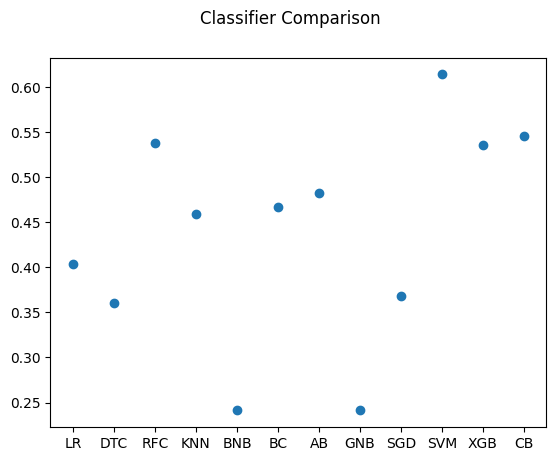

In [52]:
# Boxplot comparison
names=["LR", "DTC","RFC","KNN","BNB","BC","AB","GNB","SGD","SVM","XGB","CB"]
fig = plt.figure()
fig.suptitle("Classifier Comparison")
# ax = fig.add_subplot(111)
plt.scatter(names, accuracies)

# plt.xticks(np.arange(0, 14, step=1))
# plt.xticks(np.arange(14), names)
plt.show()